# Domain:

Automobiles, Sales and Marketing

# Business Context:
There is a huge demand for refurbished cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the refurbished car market has continued to grow over the past year and is larger than the new car market now.

Consider this: In 2018-19, the sales of refurbished cars which were previously owned by someone has increased steadily, and it is currently estimated to be approximately 1.3 times the sales of new cars. There are multiple reasons for this shift. However, the key reason is the increase in total cost of ownership of new cars which includes taxes, insurances.

There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market.

# Files:
Data has been split into two groups and provided in the module:

1. Training set : The training set is used to build your machine learning model. For the training set, we provide the price of a car (also known as the variable price) for each instance.

2. Test set : The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict the price of the car (price) for each instance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
plt.rcParams['figure.figsize']=(15,12)

In [3]:
df_train=pd.read_csv('Training_Data_Set.csv')
df_train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df_train.shape

(53515, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

# summary statistics

In [6]:
df_train.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [7]:
df_train.describe(include=object)

,Maker,model,Location,Owner Type,body_type,transmission,door_count,seat_count,fuel_type
count,53515,53515,53515,53515,4136,53515,53515,53515,53515
unique,8,23,11,4,2,2,7,10,2
top,skoda,octavia,Coimbatore,First,compact,man,4,5,diesel
freq,21563,12619,4976,13406,4127,36734,33808,38824,27559


# Redundent columns

In [10]:
df_train.drop('Id',axis=1,inplace=True)
df_train.drop('Location',axis=1,inplace=True)
df_train.drop('manufacture_year',axis=1,inplace=True)

In [9]:
total=df_train.isnull().sum().sort_values(ascending=False)
count=(df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing_value=pd.concat([total,count],axis=1,keys=['Total','Percentage'])
missing_value

,Total,Percentage
body_type,49379,92.271326
engine_power,1439,2.688966
Distance,1211,2.262917
Id,0,0.000000
fuel_type,0,0.000000
seat_count,0,0.000000
door_count,0,0.000000
transmission,0,0.000000
Vroom Audit Rating,0,0.000000
engine_displacement,0,0.000000


In [11]:
[features for features in df_train.columns if df_train[features].isnull().sum()>0]

['Distance ', 'engine_power', 'body_type']

# treating missing values

In [12]:
# we can observe that in body type more than 90 percent missing value are present so we can drop 
df_train.drop('body_type',axis=1,inplace=True)

In [13]:
df_train.engine_power.median()

91.0

In [14]:
df_train['engine_power']=df_train['engine_power'].fillna(df_train['engine_power'].median())

In [15]:
df_train['Distance ']=df_train['Distance '].fillna(df_train['Distance '].median())

In [16]:
df_train.isnull().sum()

Maker                  0
model                  0
Distance               0
Owner Type             0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [17]:
new_df=df_train[['Maker','model','Distance ','Owner Type','Age of car','engine_displacement','engine_power','Vroom Audit Rating','transmission','door_count','seat_count','fuel_type','Price']]

In [18]:
new_df.head()

,Maker,model,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,65520.0,Second,55,1964,147.0,8,man,None,None,petrol,543764.25
1,fiat,panda,27750.0,Third,7,1242,51.0,6,man,4,4,petrol,401819.25
2,bmw,x1,46000.0,Third,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,nissan,juke,43949.0,Third,8,1618,140.0,7,man,4,5,petrol,958606.50
4,bmw,x5,59524.0,Fourth & Above,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [19]:
new_df.shape

(53515, 13)

In [20]:
df_feature=df_train.drop('Price',axis=1)
df_target=df_train.Price

<AxesSubplot:>

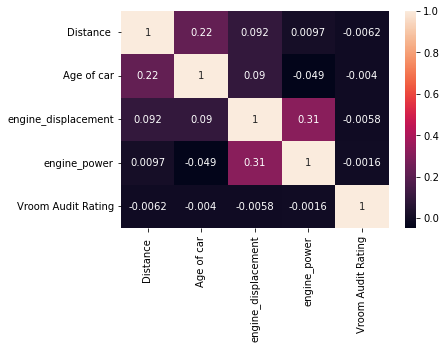

In [21]:
sns.heatmap(df_feature.corr(),annot=True)

In [22]:
df_feature.skew().sort_values()

Vroom Audit Rating      0.004991
engine_power            1.791230
Age of car              1.912556
engine_displacement    12.730460
Distance               23.602915
dtype: float64

In [23]:
df_num=df_feature.select_dtypes(include=np.number)
df_num.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating'],
      dtype='object')

In [24]:
df_cat=df_feature.select_dtypes(include=object)
df_cat.columns

Index(['Maker', 'model', 'Owner Type', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

<AxesSubplot:>

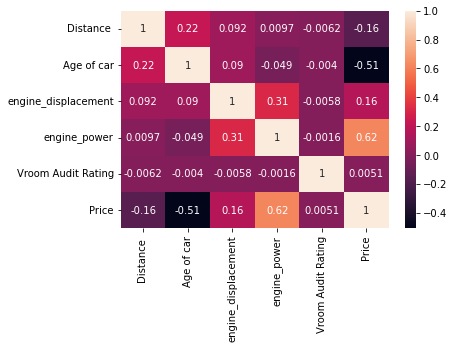

In [25]:
# No or Little Multicollinearity
sns.heatmap(new_df.corr(),annot=True)

# EDA

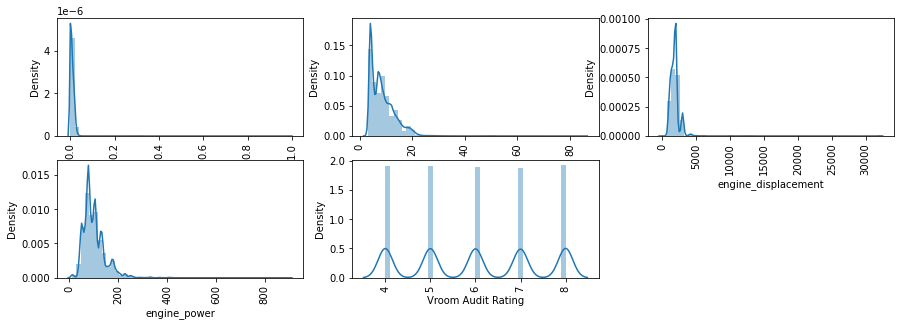

<Figure size 432x288 with 0 Axes>

In [26]:
t=1
plt.figure(figsize=(15,10))
for i in df_num:
    plt.subplot(4,3,t)
    sns.distplot(new_df[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

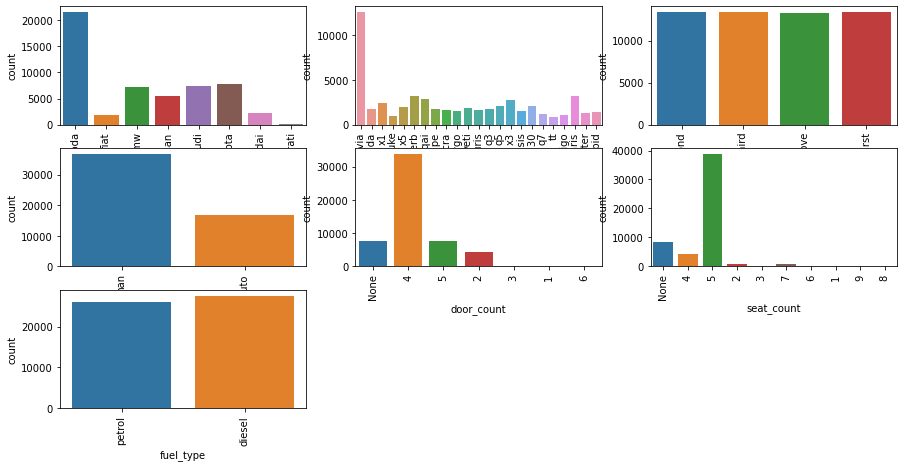

<Figure size 432x288 with 0 Axes>

In [27]:
t=1
plt.figure(figsize=(15,10))
for i in df_cat:
    plt.subplot(4,3,t)
    sns.countplot(new_df[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

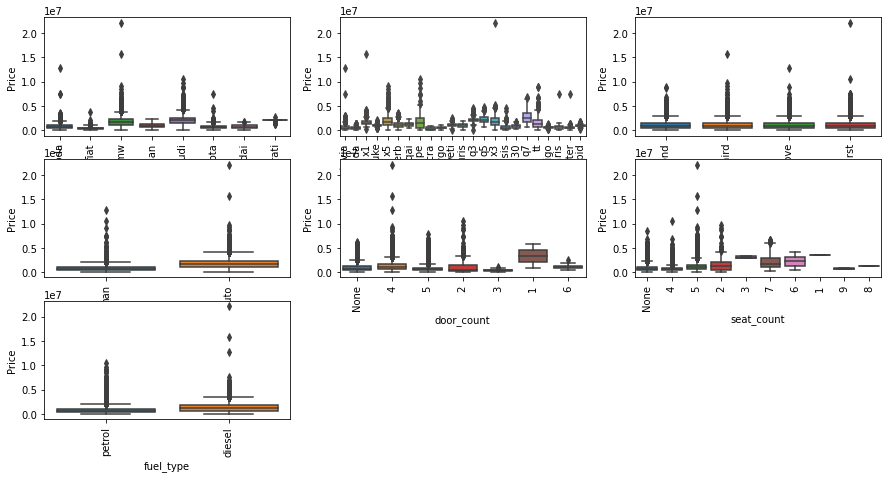

<Figure size 432x288 with 0 Axes>

In [28]:
t=1
plt.figure(figsize=(15,10))
for i in df_cat:
    plt.subplot(4,3,t)
    sns.boxplot(new_df[i],new_df['Price'])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

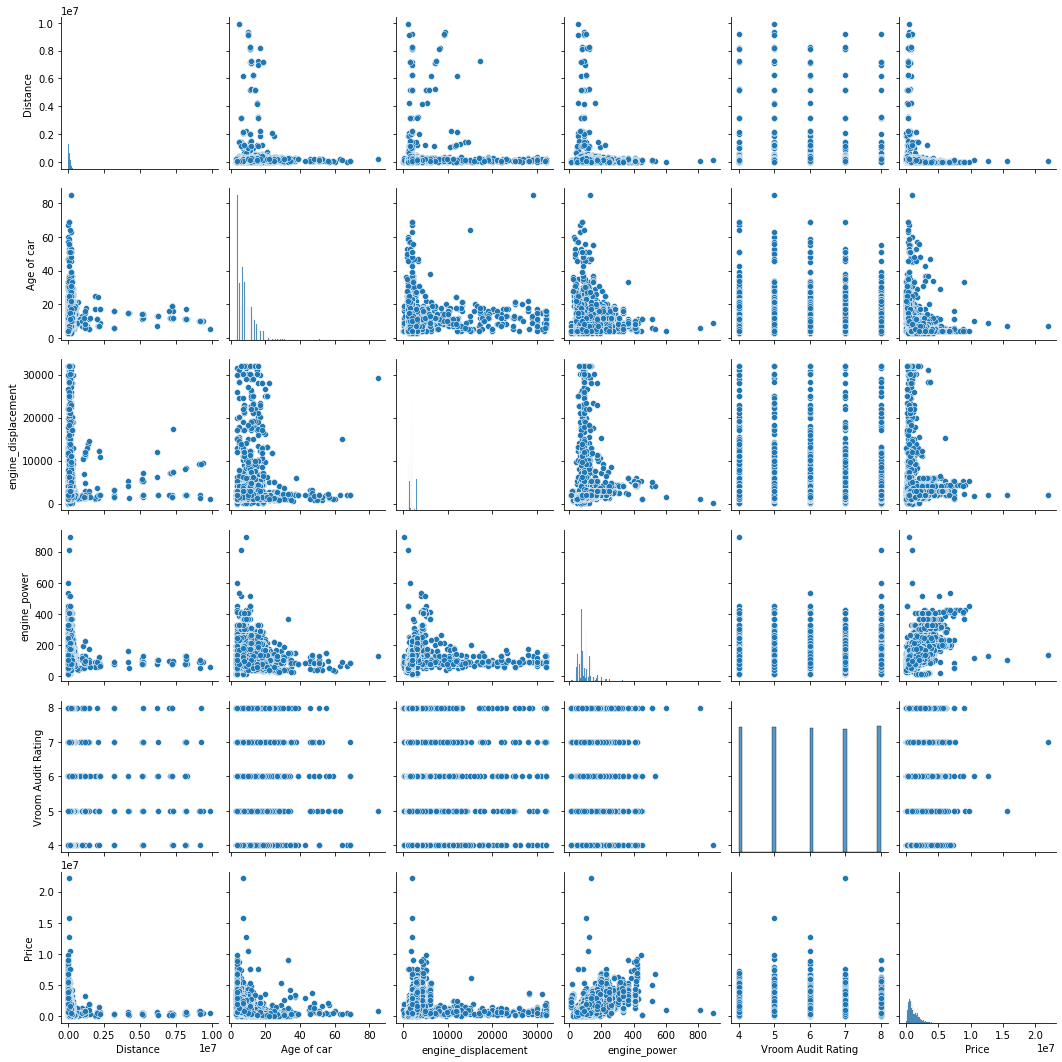

In [29]:
sns.pairplot(new_df)

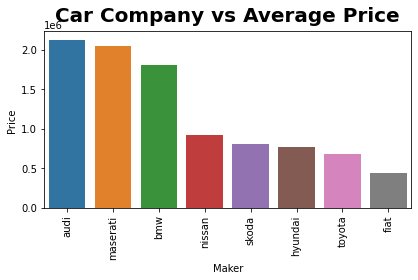

In [30]:
x = pd.DataFrame(new_df.groupby("Maker")["Price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="Price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

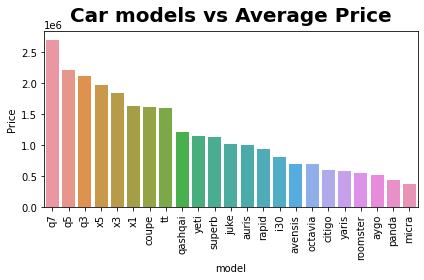

In [31]:
x = pd.DataFrame(df_train.groupby("model")["Price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="Price",data=x) 
plt.xticks(rotation=90)
plt.title("Car models vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

# feature engineering

In [32]:
df_cat.door_count.replace('None',0,inplace=True)
df_cat.door_count.replace(0,4,inplace=True)

In [33]:
df_cat.seat_count.replace('None',0,inplace=True)
df_cat.seat_count.replace(0,4,inplace=True)

In [34]:
df_scaled = df_num.copy()
from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer()
pt = PowerTransformer(method='yeo-johnson', standardize=True)


In [35]:
df_scaled['Distance '] = pt.fit_transform(df_scaled[['Distance ']])
df_scaled['engine_displacement'] = pt.fit_transform(df_scaled[['engine_displacement']])
df_scaled['Age of car'] = pt.fit_transform(df_scaled[['Age of car']])
df_scaled['engine_power'] = pt.fit_transform(df_scaled[['engine_power']])

In [36]:
df_scaled.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating
0,0.219672,3.118585,0.393766,1.114821,8
1,-0.279903,-0.101184,-0.989274,-1.332384,6
2,-0.001004,-0.827254,0.437810,0.284840,7
3,-0.027866,0.172800,-0.168405,0.991314,7
4,0.157565,-0.101184,1.510520,1.639240,7


In [37]:
df_dummy=pd.get_dummies(data=df_cat,columns=['Owner Type','transmission','fuel_type'],drop_first=True)


In [38]:
df_dummy.Maker.value_counts(1)

skoda       0.402934
toyota      0.146501
audi        0.136896
bmw         0.134131
nissan      0.102495
hyundai     0.041857
fiat        0.034476
maserati    0.000710
Name: Maker, dtype: float64

In [39]:
df_dummy['Maker']=df_dummy['Maker'].replace(df_dummy.Maker.value_counts(1))
df_dummy['model']=df_dummy['model'].replace(df_dummy.model.value_counts(1))
df_dummy['door_count']=df_dummy['door_count'].replace(df_dummy.door_count.value_counts(1))
df_dummy['seat_count']=df_dummy['seat_count'].replace(df_dummy.seat_count.value_counts(1))

In [40]:
df_dummy.head()

,Maker,model,door_count,seat_count,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
0,0.402934,0.235803,0.140783,0.159040,0,1,0,1,1
1,0.034476,0.033056,0.631748,0.083472,0,0,1,1,1
2,0.134131,0.045221,0.631748,0.725479,0,0,1,0,0
3,0.102495,0.017845,0.631748,0.725479,0,0,1,1,1
4,0.134131,0.036980,0.631748,0.725479,1,0,0,0,0


In [41]:
df=pd.concat([df_scaled,df_dummy],axis=1)
df.head(2)

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker,model,door_count,seat_count,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
0,0.219672,3.118585,0.393766,1.114821,8,0.402934,0.235803,0.140783,0.159040,0,1,0,1,1
1,-0.279903,-0.101184,-0.989274,-1.332384,6,0.034476,0.033056,0.631748,0.083472,0,0,1,1,1


In [ ]:
#  create base model

# LINEARREGRESSION¶

In [42]:
X=df
y=df_train.Price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
linerag=LinearRegression()
model=linerag.fit(X_train,y_train)

In [43]:
pred=model.predict(X_test)

In [45]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

456605.55936879735


# XGBREGRESSOR

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [47]:
xgb=XGBRegressor(verbosity=0)
print(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [48]:
xgb_model=xgb.fit(X_train, y_train)

In [49]:
score = xgb.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.964198255537938


In [50]:
pred=xgb_model.predict(X_test)

In [51]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

192696.50545081793


# RANDOMFOREST REGRESSOR

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
ypred = rf.predict(X_test)

# calculate the root mean squared error of the model
rmse = mean_squared_error(y_test, ypred, squared=False)
print('RMSE:', rmse)

RMSE: 198423.86160643678


In [53]:
score = rf.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.987397558812118


# DESCIONTREE REGRESSOR¶

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Fit the regressor with the training data
regressor.fit(X_train, y_train)

# Predict the output for the test data
y_predicts = regressor.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_predicts)

# Print the mean squared error
print("Mean Squared Error:", mse)
# calculate the root mean squared error of the model
rmse = mean_squared_error(y_test, y_predicts, squared=False)
print('RMSE:', rmse)

Mean Squared Error: 76637284315.30136
RMSE: 276834.3987211513


In [55]:
score = regressor.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9994136598214253


# test data

In [81]:
df_test=pd.read_csv('Test_Data_Set.csv')
df_test.head(5)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   model                5615 non-null   object 
 3   Location             5615 non-null   object 
 4   Distance             5487 non-null   float64
 5   Owner Type           5615 non-null   object 
 6   manufacture_year     5615 non-null   int64  
 7   Age of car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            422 non-null    object 
 11  Vroom Audit Rating   5615 non-null   int64  
 12  transmission         5615 non-null   object 
 13  door_count           5615 non-null   object 
 14  seat_count           5615 non-null   object 
 15  fuel_type            5615 non-null   o

In [83]:
df_test.skew()

Id                      0.000000
Distance               21.095898
manufacture_year       -2.151669
Age of car              2.151669
engine_displacement    13.087956
engine_power            2.666466
Vroom Audit Rating      0.005117
dtype: float64

<AxesSubplot:>

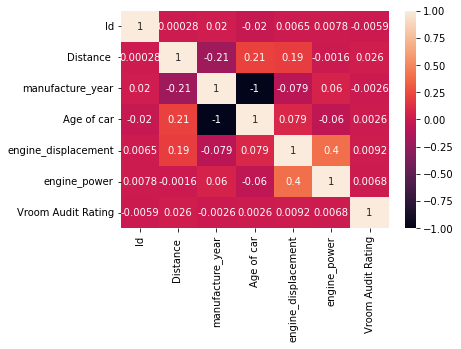

In [84]:
sns.heatmap(df_test.corr(),annot=True)

# redundent columns

In [85]:
df_test.drop('Id',axis=1,inplace=True)
df_test.drop('Location',axis=1,inplace=True)
df_test.drop('manufacture_year',axis=1,inplace=True)

# missing value treatment

In [86]:
total=df_test.isnull().sum().sort_values(ascending=False)
count=(df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending=False)
missing_value=pd.concat([total,count],axis=1,keys=['Total','Percentage'])
missing_value

,Total,Percentage
body_type,5193,92.484417
engine_power,168,2.991986
Distance,128,2.279608
Maker,0,0.000000
model,0,0.000000
Owner Type,0,0.000000
Age of car,0,0.000000
engine_displacement,0,0.000000
Vroom Audit Rating,0,0.000000
transmission,0,0.000000


In [87]:
# we can observe that in body type more than 90 percent missing value are present so we can drop 
df_test.drop('body_type',axis=1,inplace=True)

In [88]:
df_test['engine_power']=df_test['engine_power'].fillna(df_test['engine_power'].median())

In [89]:
df_test['Distance ']=df_test['Distance '].fillna(df_test['Distance '].median())

In [90]:
df_num=df_test.select_dtypes(include=np.number)
df_num.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating'],
      dtype='object')

In [91]:
df_cat=df_test.select_dtypes(include=object)
df_cat.columns

Index(['Maker', 'model', 'Owner Type', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

# EDA

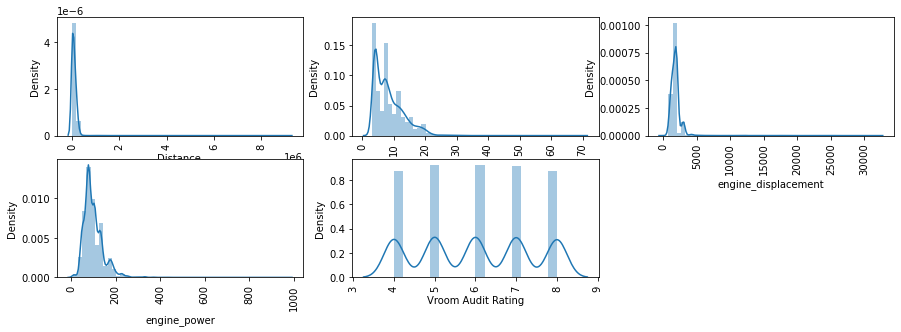

<Figure size 432x288 with 0 Axes>

In [92]:
t=1
plt.figure(figsize=(15,10))
for i in df_num:
    plt.subplot(4,3,t)
    sns.distplot(df_test[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

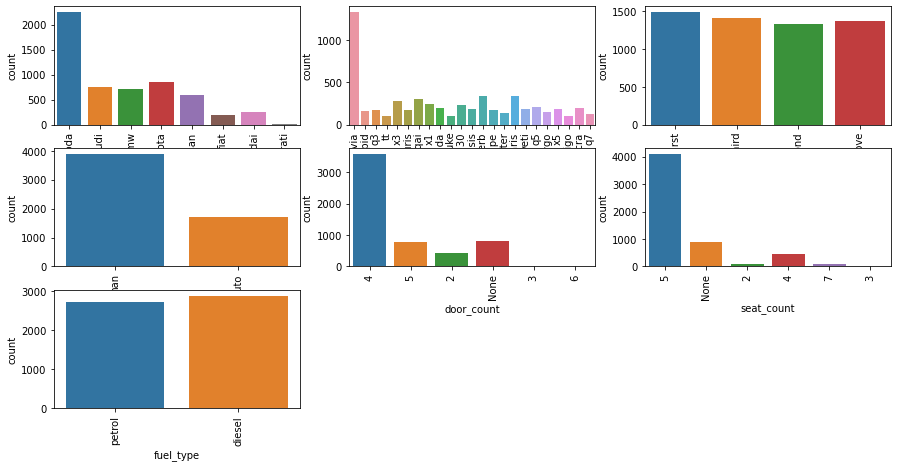

<Figure size 432x288 with 0 Axes>

In [93]:
t=1
plt.figure(figsize=(15,10))
for i in df_cat:
    plt.subplot(4,3,t)
    sns.countplot(df_test[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

# feature engineering

In [94]:
df_scale = df_num.copy()
from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer()
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [95]:
col_names=['Distance ','engine_displacement','Age of car','engine_power','Vroom Audit Rating']

In [96]:
df_scale['Distance '] = pt.fit_transform(df_scale[['Distance ']])
df_scale['engine_displacement'] = pt.fit_transform(df_scale[['engine_displacement']])
df_scale['Age of car'] = pt.fit_transform(df_scale[['Age of car']])
df_scale['engine_power'] = pt.fit_transform(df_scale[['engine_power']])

In [97]:
df_scale.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating
0,0.834221,0.970817,-0.180576,-0.476372,5
1,-0.210536,-0.786274,-0.174639,-0.415974,4
2,-0.190317,-0.786274,0.456177,0.428311,5
3,-0.737497,-1.301524,0.456177,0.428311,8
4,-0.842296,-1.301524,0.479646,1.510208,4


In [98]:
df_cat=df_test.select_dtypes(object)
df_cat.columns

Index(['Maker', 'model', 'Owner Type', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [99]:
df_dummies=pd.get_dummies(data=df_cat,columns=['Owner Type','transmission','fuel_type'],drop_first=True)

In [100]:
df_dummies['Maker']=df_dummies['Maker'].replace(df_dummies.Maker.value_counts(1))

In [101]:
df_dummies['model']=df_dummies['model'].replace(df_dummies.model.value_counts(1))
df_dummies['door_count']=df_dummies['door_count'].replace(df_dummies.door_count.value_counts(1))
df_dummies['seat_count']=df_dummies['seat_count'].replace(df_dummies.seat_count.value_counts(1))

In [102]:
df_tst=pd.concat([df_scale,df_dummies],axis=1)
df_tst.head(2)

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker,model,door_count,seat_count,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
0,0.834221,0.970817,-0.180576,-0.476372,5,0.40089,0.237400,0.638112,0.730187,0,0,0,1,1
1,-0.210536,-0.786274,-0.174639,-0.415974,4,0.40089,0.028317,0.638112,0.730187,0,0,1,1,0


In [103]:
df_tst.shape

(5615, 14)

# using linear regression prediction

In [104]:
y_prediction=model.predict(df_tst)
y_prediction

array([ 105971.21630977, 1117129.13847857, 1459746.72081397, ...,
        316842.81827211,  993569.12205818,  780552.29116941])

In [ ]:
pd.DataFrame(y_prediction,columns=['Price']).to_csv('predicted_car_price.csv')

# using xgbregressor

In [105]:
y_predict=xgb_model.predict(df_tst)
y_predict

array([ 407268.38, 1021943.25, 1298139.6 , ...,  350630.38,  944717.75,
        640737.6 ], dtype=float32)

In [ ]:
pd.DataFrame(y_predict,columns=['Price']).to_csv('pred_car_price.csv')

# # randomforest treeregressor

In [106]:
y_prd=rf.predict(df_tst)
y_prd

array([ 386760.915 ,  943620.6825, 1447339.755 , ...,  387200.235 ,
       1056064.545 ,  735423.81  ])

In [ ]:
pd.DataFrame(y_prd,columns=['Price']).to_csv('used_car_price.csv')

# using descisiontreeregressor

In [ ]:
y_pred=regressor.predict(df_tst)
y_pred